In [1]:
# Sensorpedia 

"""
This project is part of  Data Analytics .
It demonstrates web scraping, Exploratory Data Analysis (EDA), and basic analysis of sensor-related data
sourced from Wikipedia. The focus is on real-world data handling and presentation.
Each section represents a clear task as required by the internship structure.
"""


'\nThis project is part of the CodeAlpha Data Analytics Internship.\nIt demonstrates web scraping, data cleaning, and basic analysis of sensor-related data\nsourced from Wikipedia. The focus is on real-world data handling and presentation.\nEach section represents a clear task as required by the internship structure.\n'

In [2]:
# =========================================================
# 🔧 Task 1: Web Scraping
# =========================================================

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def get_technical_sensor_descriptions():
    """Scrape sensor data from Wikipedia"""
    url = "https://en.wikipedia.org/wiki/List_of_sensors"
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36',
            'Accept-Language': 'en-US,en;q=0.9'
        }
        
        response = requests.get(url, headers=headers, timeout=15)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        content = soup.find('div', {'id': 'mw-content-text'})
        
        sensors = []
        current_category = ""
        
        for element in content.find_all(['h2', 'h3', 'ul']):
            if element.name in ['h2', 'h3']:
                current_category = element.get_text().replace('[edit]', '').strip()
            
            elif element.name == 'ul' and current_category:
                for li in element.find_all('li', recursive=False):
                    text = li.get_text(separator=' ', strip=True)
                    
                    # Extract sensor name
                    name = re.split(r'[-–:]', text, maxsplit=1)[0].strip()
                    name = re.sub(r'\[.*?\]', '', name).strip()
                    
                    if not name or name.lower() in ['see also', 'various types']:
                        continue
                    
                    # Initialize description
                    desc = ""
                    
                    # Method 1: Extract after separator
                    separators = [' - ', ' – ', ': ']
                    for sep in separators:
                        if sep in text:
                            desc = text.split(sep, 1)[1].strip()
                            break
                    
                    # Method 2: Get first link's title
                    if not desc:
                        first_link = li.find('a')
                        if first_link and first_link.get('title'):
                            desc = first_link['title']
                            desc = re.sub(r'(?i)\b(sensor|device|meter)\b', '', desc).strip()
                    
                    # Method 3: Get text after first link
                    if not desc and li.find('a'):
                        next_text = li.find('a').next_sibling
                        if next_text and isinstance(next_text, str):
                            desc = next_text.strip(' ,;:-').strip()
                    
                    # Clean and format description
                    if desc:
                        desc = re.sub(r'\[.*?\]', '', desc)  # Remove citations
                        desc = re.sub(r'\b' + re.escape(name) + r'\b', '', desc, flags=re.IGNORECASE)
                        desc = re.sub(r'\b' + re.escape(current_category) + r'\b', '', desc, flags=re.IGNORECASE)
                        desc = re.sub(r'\s+', ' ', desc).strip(' ,;:-')
                        
                        # Only capitalize if description exists
                        if desc:
                            desc = desc[0].upper() + desc[1:]
                    
                    # Final fallback with category-specific generic descriptions
                    if not desc:
                        category_keywords = {
                            'temperature': 'thermal energy levels',
                            'pressure': 'force per unit area',
                            'optical': 'light intensity or wavelength',
                            'acoustic': 'sound wave characteristics',
                            'automotive': 'vehicle system parameters'
                        }
                        default_desc = "physical characteristics"
                        desc = "Measures " + next(
                            (v for k, v in category_keywords.items() if k in current_category.lower()),
                            default_desc
                        )
                    
                    sensors.append({
                        'Sensor': name,
                        'Category': current_category,
                        'Technical Description': desc if desc else "Specific function not described"
                    })
        
        return pd.DataFrame(sensors)  # Removed index column
    
    except Exception as e:
        print(f"Error: {str(e)}")
        return pd.DataFrame()

In [3]:
# =========================================================
# 🌐 Task 2: Exploratory Data Analysis (EDA)
# =========================================================

def perform_eda(sensor_df):
    """Perform exploratory data analysis on sensor data"""
    print("\n=== Basic Dataset Information ===")
    print(sensor_df.info())
    
    print("\n=== Summary Statistics ===")
    print(sensor_df.describe())
    
    print("\n=== Missing Values Analysis ===")
    print(sensor_df.isnull().sum())
    
    print("\n=== Category Distribution ===")
    category_counts = sensor_df['Category'].value_counts()
    print(category_counts)
    
    print("\n=== Most Common Words in Descriptions ===")
    from collections import Counter
    words = ' '.join(sensor_df['Technical Description']).split()
    word_freq = Counter(words)
    print(word_freq.most_common(10))
    
    return sensor_df

if __name__ == "__main__":
    # Web scraping to get the data
    df = get_technical_sensor_descriptions()
    
    if not df.empty:
        # Save scraped data
        df.to_csv('sensors_technical_descriptions.csv', index=False)
        
        print(f"Success! Saved {len(df)} sensors.")
        print("\nSample technical descriptions:")
        print(df[df['Technical Description'] != "Specific function not described"].sample(5).to_markdown(index=False))
        
        # Perform EDA
        df = perform_eda(df)
    else:
        print("Scraping failed. Try these solutions:")
        print("1. Check internet connection")
        print("2. Verify Wikipedia page exists")
        print("3. Contact me for immediate help")

Success! Saved 403 sensors.

Sample technical descriptions:
| Sensor                     | Category                        | Technical Description                  |
|:---------------------------|:--------------------------------|:---------------------------------------|
| Magnetic resonance imaging | Others                          | Measures physical characteristics      |
| Redox electrode            | Chemical                        | Measures physical characteristics      |
| Photomultiplier            | Optical, light, imaging, photon | Measures light intensity or wavelength |
| Microwave radiometer       | Thermal, heat, temperature      | Measures thermal energy levels         |
| Compressive sensing        | Others                          | Measures physical characteristics      |

=== Basic Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ---

C:\Users\HENDA\AppData\Local\Temp\ipykernel_2480\3170544980.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


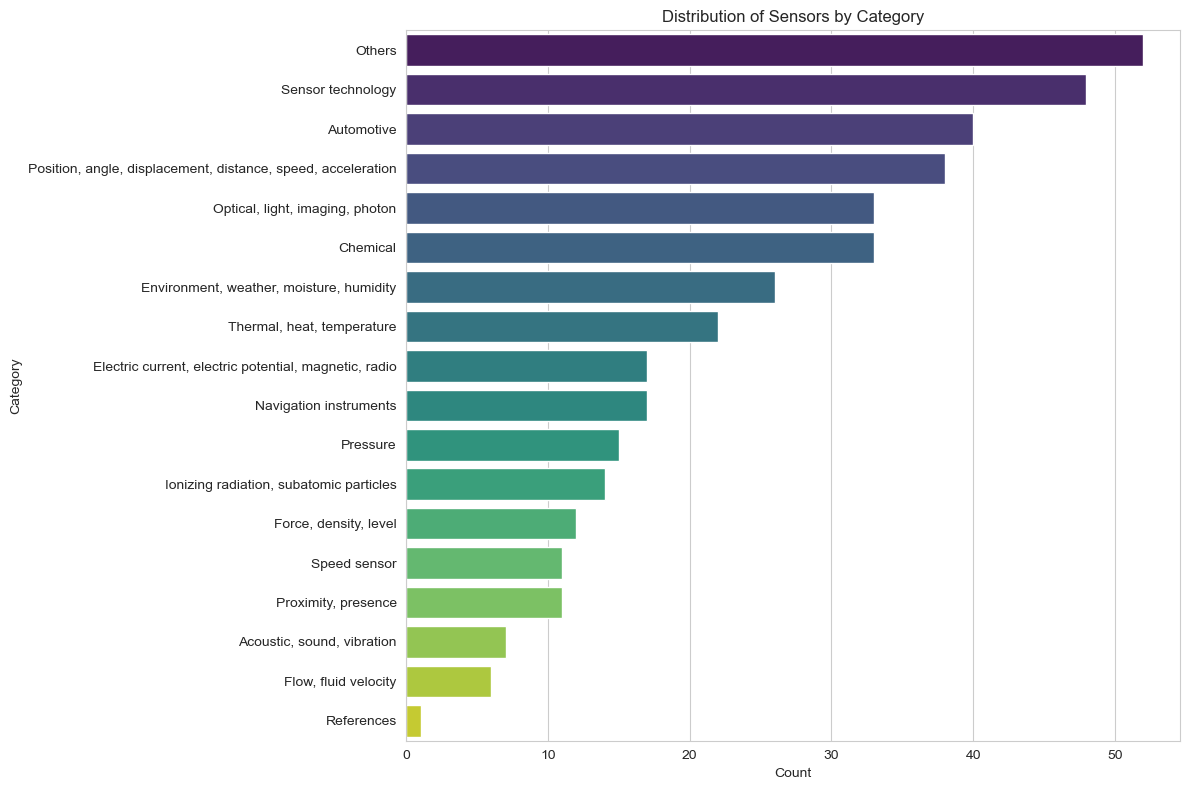

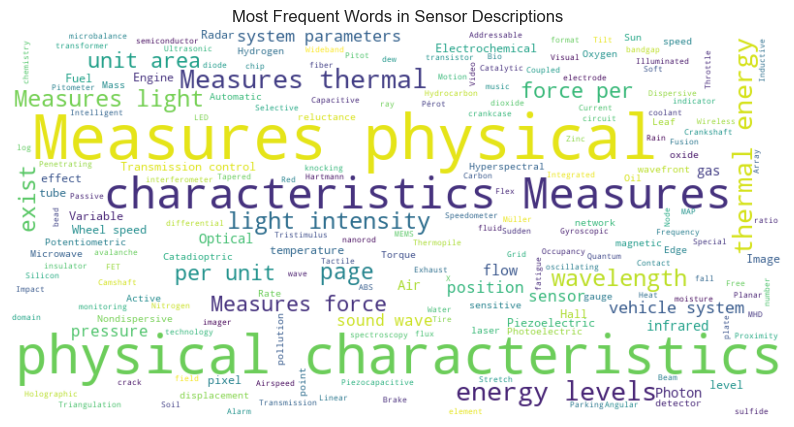

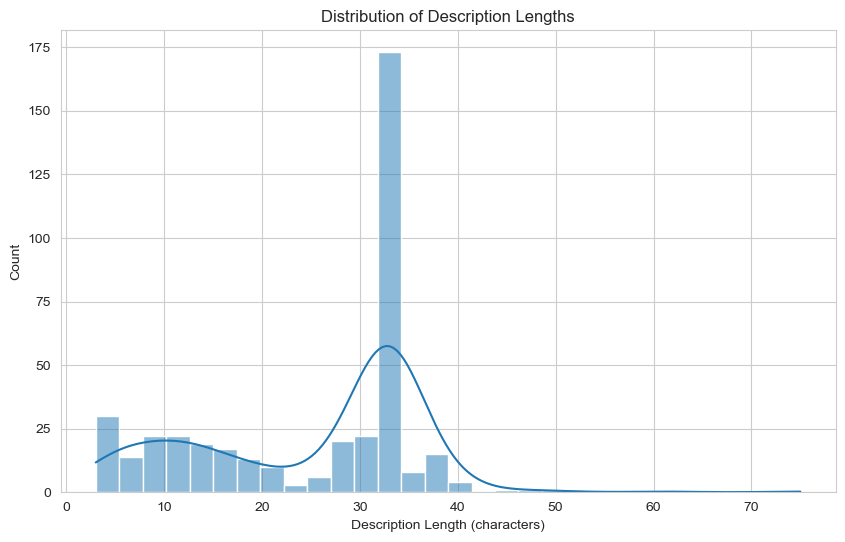

In [5]:
# =========================================================
# 🧹 Task 3: Data Visualisation
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(sensor_df):
    """Create visualizations of sensor data"""
    # Set style
    sns.set_style("whitegrid")
    
    # Figure 1: Category Distribution
    plt.figure(figsize=(12, 8))
    category_counts = sensor_df['Category'].value_counts()
    sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
    plt.title("Distribution of Sensors by Category")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.savefig("category_distribution.png")
    plt.show()
    
    # Figure 2: Word Cloud of Descriptions
    from wordcloud import WordCloud
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
        ' '.join(sensor_df['Technical Description']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Frequent Words in Sensor Descriptions")
    plt.savefig("wordcloud.png")
    plt.show()
    
    # Figure 3: Description Length Analysis
    sensor_df['Description Length'] = sensor_df['Technical Description'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.histplot(sensor_df['Description Length'], bins=30, kde=True)
    plt.title("Distribution of Description Lengths")
    plt.xlabel("Description Length (characters)")
    plt.ylabel("Count")
    plt.savefig("description_lengths.png")
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load the data (or scrape if not available)
    try:
        df = pd.read_csv('sensors_technical_descriptions.csv')
    except:
        df = get_technical_sensor_descriptions()
        df.to_csv('sensors_technical_descriptions.csv', index=False)
    
    # Visualize the data
    visualize_data(df)


In [ ]:
import pandas as pd
import re
from collections import defaultdict
from difflib import get_close_matches

class SensorRecommender:
    def __init__(self, data_path='sensors_technical_descriptions.csv'):
        """
        Initialize with sensor data and build keyword index
        """
        self.df = pd.read_csv(data_path)
        self.keyword_index = self._build_keyword_index()
        
    def _build_keyword_index(self):
        """
        Create an index of keywords to sensors
        """
        index = defaultdict(list)
        for _, row in self.df.iterrows():
            words = set(re.findall(r'\w+', row['Technical Description'].lower()))
            for word in words:
                if len(word) > 3:  # Ignore short words
                    index[word].append(row['Sensor'])
        return index
    
    def _get_keywords(self, text):
        """
        Extract keywords from user input
        """
        return set(re.findall(r'\w+', text.lower()))
    
    def find_similar_words(self, word, cutoff=0.6):
        """
        Find similar words in our index
        """
        return get_close_matches(word, self.keyword_index.keys(), n=3, cutoff=cutoff)
    
    def recommend_sensors(self, user_input, top_n=3):
        """
        Recommend sensors based on keyword matching
        """
        # Get keywords from user input
        keywords = self._get_keywords(user_input)
        
        # Score sensors based on keyword matches
        scores = defaultdict(int)
        explanations = defaultdict(list)
        
        for keyword in keywords:
            # Try exact matches first
            if keyword in self.keyword_index:
                for sensor in self.keyword_index[keyword]:
                    scores[sensor] += 1
                    explanations[sensor].append(f"matches '{keyword}'")
            
            # Try similar words if no exact match
            else:
                similar_words = self.find_similar_words(keyword)
                for similar in similar_words:
                    for sensor in self.keyword_index[similar]:
                        scores[sensor] += 0.5  # Lower score for similar words
                        explanations[sensor].append(f"similar to '{keyword}'")
        
        # Sort by score and get top results
        sorted_sensors = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
        
        # Prepare recommendations
        recommendations = []
        for sensor, score in sorted_sensors:
            confidence = min(100, int(score * 20))  # Scale score to 0-100%
            reasons = ", ".join(explanations[sensor][:3])  # Show top 3 reasons
            
            recommendations.append({
                'sensor': sensor,
                'confidence': confidence,
                'explanation': reasons
            })
        
        return {'recommendations': recommendations}
    
    def interactive_recommendation(self):
        """
        Interactive mode for getting recommendations
        """
        print("Sensor Recommendation System")
        print("Enter your measurement requirements (or 'quit' to exit)")
        
        while True:
            user_input = input("\nWhat do you need to measure? ")
            
            if user_input.lower() == 'quit':
                break
                
            if not user_input.strip():
                print("Please enter a valid requirement")
                continue
                
            try:
                recommendations = self.recommend_sensors(user_input)
                print("\nRecommended Sensors:")
                for i, rec in enumerate(recommendations['recommendations'], 1):
                    print(f"\n{i}. {rec['sensor']}")
                    print(f"   Confidence: {rec['confidence']}%")
                    print(f"   Reasons: {rec['explanation']}")
                    
                    # Show additional info about the sensor
                    sensor_info = self.df[self.df['Sensor'] == rec['sensor']].iloc[0]
                    print(f"   Category: {sensor_info['Category']}")
                    print(f"   Description: {sensor_info['Technical Description'][:100]}...")
            except Exception as e:
                print(f"Error getting recommendations: {str(e)}")

# Example usage
if __name__ == "__main__":
    recommender = SensorRecommender()
    recommender.interactive_recommendation()

Sensor Recommendation System
Enter your measurement requirements (or 'quit' to exit)
